## Weight-Height Analysis

This dataset represents a synthetic relationship between weight and height, designed to exhibit a non-linear, polynomial trend suitable for polynomial regression analysis. The dataset includes 50 data points where "Weight" is the independent variable and "Height" is the dependent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Practice-2 Weight-Height Polynomial Dataset.csv")
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


In [3]:
df.shape

(50, 2)

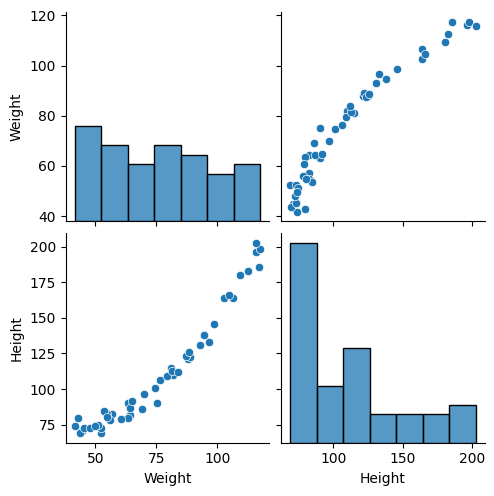

In [4]:
sns.pairplot(df)

In [5]:
x = df['Weight'].values
y = df['Height'].values

In [6]:
x.shape, y.shape

((50,), (50,))

In [7]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.fit_transform(x_test)

In [10]:
X_train_poly.shape, X_test_poly.shape

((40, 4), (10, 4))

In [11]:
y_train = np.array(y_train).reshape(-1,)

In [12]:
y_train.shape

(40,)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test_poly)

In [15]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = metrics.root_mean_squared_error(y_test, y_pred)
print('R squared: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Squared Error:', meanSqErr)
print('Root Mean Squared Error:', rootMeanSqErr)


R squared: 0.97
Mean Absolute Error: 3.5299508941338784
Mean Squared Error: 20.74035811550828
Root Mean Squared Error: 4.554158332283615


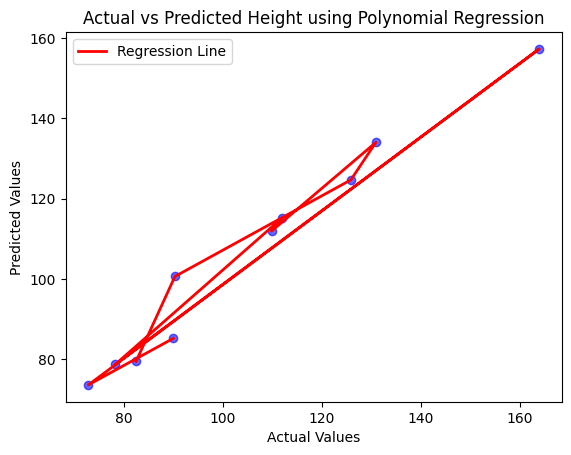

In [16]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Actual vs Predicted Height using Polynomial Regression")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [17]:
y_test

array([[ 82.52834526],
       [ 90.38135525],
       [125.91351247],
       [130.97517255],
       [109.89926158],
       [111.9830738 ],
       [ 78.34065092],
       [163.974773  ],
       [ 72.8829414 ],
       [ 90.06380351]])

In [18]:
sorted_idx = np.argsort(y_test.flatten())
y_test_sorted = y_test.flatten()[sorted_idx]
y_pred_sorted = y_pred.flatten()[sorted_idx]

In [19]:
sorted_idx

array([8, 6, 0, 9, 1, 4, 5, 2, 3, 7], dtype=int64)

In [20]:
y_test_sorted = y_test_sorted.reshape(-1, 1)
y_pred_sorted = y_pred_sorted.reshape(-1, 1)

In [21]:
y_test_sorted

array([[ 72.8829414 ],
       [ 78.34065092],
       [ 82.52834526],
       [ 90.06380351],
       [ 90.38135525],
       [109.89926158],
       [111.9830738 ],
       [125.91351247],
       [130.97517255],
       [163.974773  ]])

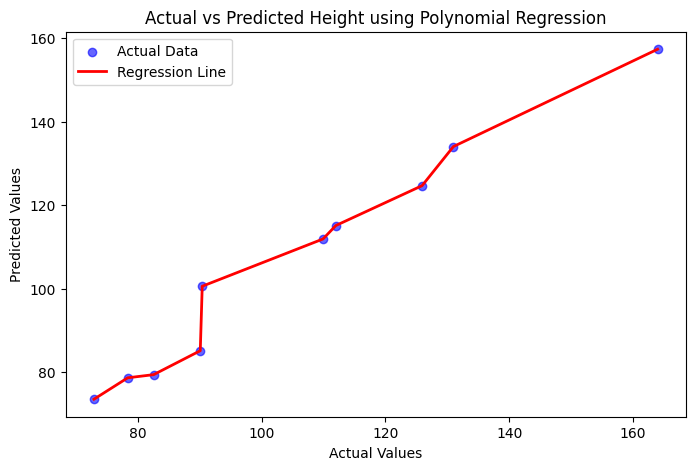

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Actual Data")
plt.plot(y_test_sorted, y_pred_sorted, color='red', linewidth=2, label="Regression Line")
plt.title("Actual vs Predicted Height using Polynomial Regression")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()